In [23]:
# Import packages
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering, Birch
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
# Set path
path = os.getcwd()
folder = 'Data DSA3101'
data_directory = os.path.join(path, folder)
os.chdir(data_directory)
print(data_directory)
print(os.getcwd())

c:\Users\inbam\Desktop\DSA3101-Project-main\Data DSA3101
c:\Users\inbam\Desktop\DSA3101-Project-main\Data DSA3101


# Loading Datasets

In [3]:
# Load data
customer_data = pd.read_csv('customers.csv')
transaction_data = pd.read_csv('transactions_summary.csv')

# Data cleaning and processing
customer_columns_to_convert = ['credit_default', 'credit_card', 'personal_loan', 'mortgage', 'savings_account', 'investment_product', 'auto_loan', 'wealth_management']
customer_data[customer_columns_to_convert] = customer_data[customer_columns_to_convert].replace({'yes': 1, 'no': 0})
customer_data = customer_data[customer_data['income'] >= 0]
customer_data = customer_data[customer_data['age'] >= 21]
customer_data = customer_data[customer_data['created_at'] < '2025-03-01']
customer_data = customer_data.drop(columns=['created_at'])

# Show first few entries
customer_data.head()

,customer_id,age,job,marital,education,credit_default,customer_segment,region,income,credit_card,personal_loan,mortgage,savings_account,investment_product,auto_loan,wealth_management
0,1,38,blue-collar,married,secondary,0,High-Value,Urban,2603,1,1,1,1,1,1,1
2,3,73,services,divorced,secondary,0,Budget-Conscious,Urban,3130,1,0,0,0,1,1,0
3,4,87,retired,married,primary,0,Retired,Urban,2401,1,1,0,1,0,0,0
5,6,46,technician,married,tertiary,0,Middle-Market,Urban,3355,1,1,0,1,0,1,1
6,7,70,admin,married,tertiary,0,Budget-Conscious,Urban,4918,1,1,1,1,0,1,0


In [4]:
# Load data
usage_data = pd.read_csv('digital_usage.csv')

# Data cleaning and processing
usage_columns_to_convert = ['has_mobile_app', 'has_web_account']
usage_data[usage_columns_to_convert] = usage_data[usage_columns_to_convert].replace({'Yes': 1, 'No': 0})
usage_data = usage_data.drop(columns=['last_mobile_login', 'last_web_login'])

# Show first few entries
usage_data.head()

,customer_id,has_mobile_app,has_web_account,mobile_logins_per_week,web_logins_per_week,avg_mobile_session_duration,avg_web_session_duration
0,1,1,1,10,5,3.5,6.1
1,2,1,1,9,4,4.5,3.9
2,3,1,1,6,10,2.5,5.4
3,4,1,1,6,8,3.0,6.8
4,5,1,1,11,6,1.3,1.6


In [5]:
# Load data
transaction_data = pd.read_csv('transactions_summary.csv')

# Data cleaning and processing
transaction_data = transaction_data[transaction_data['current_balance'] >= 0]
transaction_data = transaction_data[transaction_data['peak_month_spending'] >= 0]

# Show first few entries
transaction_data.head()

,customer_id,days_since_last_transaction,current_balance,peak_month,peak_month_spending,peak_month_frequency,total_transactions_3m,total_transactions_6m,total_transactions_12m,total_transaction_amount_3m,...,average_transaction_amount_12m,transaction_frequency_3m,transaction_frequency_6m,transaction_frequency_12m,high_value_transaction_rate_3m,high_value_transaction_rate_6m,high_value_transaction_rate_12m,online_transaction_ratio_3m,online_transaction_ratio_6m,online_transaction_ratio_12m
0,1,11,5694.487702,11,12893.350846,48,95,217,411,14545.179016,...,140.434761,31.666667,36.166667,34.25,0.115789,0.078341,0.053528,0.622103,0.748928,0.680343
1,2,55,1738.012820,6,2084.299245,30,106,164,339,4515.127760,...,26.678337,35.333333,27.333333,28.25,0.037736,0.042683,0.044248,0.710467,0.737272,0.665027
2,3,33,6638.183864,9,5563.095304,25,69,162,252,10717.607838,...,114.570766,23.000000,27.000000,21.00,0.130435,0.141975,0.123016,0.502275,0.488544,0.594546
3,4,0,4850.871858,6,3312.311841,15,46,90,153,5781.801272,...,91.705285,15.333333,15.000000,12.75,0.130435,0.111111,0.091503,0.405197,0.470144,0.495167
4,5,6,4163.480661,6,35418.819413,61,116,263,516,21624.827306,...,315.401688,38.666667,43.833333,43.00,0.120690,0.125475,0.106589,0.730529,0.708079,0.732546


# Merged Dataset

In [6]:
# Merge the datasets
df = pd.merge(customer_data, transaction_data, on='customer_id', how='inner')
df = pd.merge(df, usage_data, on='customer_id', how='inner')

# Check the shape of the merge dataset
print(df.shape) # 9429 rows
print(df.columns)

(9429, 45)
Index(['customer_id', 'age', 'job', 'marital', 'education', 'credit_default',
       'customer_segment', 'region', 'income', 'credit_card', 'personal_loan',
       'mortgage', 'savings_account', 'investment_product', 'auto_loan',
       'wealth_management', 'days_since_last_transaction', 'current_balance',
       'peak_month', 'peak_month_spending', 'peak_month_frequency',
       'total_transactions_3m', 'total_transactions_6m',
       'total_transactions_12m', 'total_transaction_amount_3m',
       'total_transaction_amount_6m', 'total_transaction_amount_12m',
       'average_transaction_amount_3m', 'average_transaction_amount_6m',
       'average_transaction_amount_12m', 'transaction_frequency_3m',
       'transaction_frequency_6m', 'transaction_frequency_12m',
       'high_value_transaction_rate_3m', 'high_value_transaction_rate_6m',
       'high_value_transaction_rate_12m', 'online_transaction_ratio_3m',
       'online_transaction_ratio_6m', 'online_transaction_ratio_12m'

In [ ]:
# Drop customer_id and customer_segment
df_no_id = df.drop('customer_id', axis=1)
df_no_id = df.drop('customer_segment', axis=1)

# Create one-hot encoding for categorical variables
df_encoded_no_id = pd.get_dummies(df_no_id)

# Standardise the data
data_scaler = StandardScaler()
scaled_data = data_scaler.fit_transform(df_encoded_no_id)
scaled_data.shape

(9429, 59)

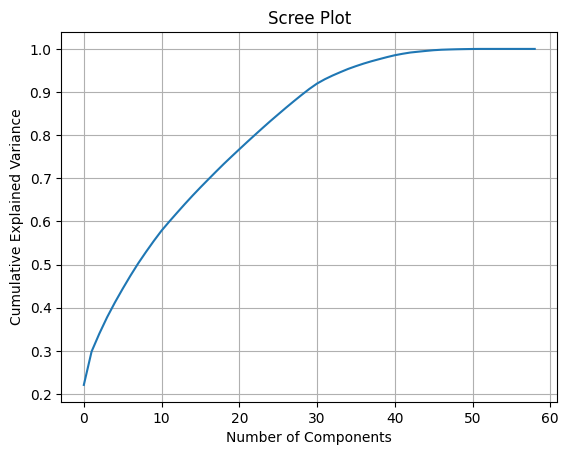

In [25]:
# Define batch size and initialise Incremental PCA
batch_size = 100
ipca = IncrementalPCA()

# Fit in mini-batches
for i in range(0, scaled_data.shape[0], batch_size):
    ipca.partial_fit(scaled_data[i:i+batch_size])  # Partial fit on each batch

# Create a Scree Plot to decide the number of components to use
plt.plot(np.cumsum(ipca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()

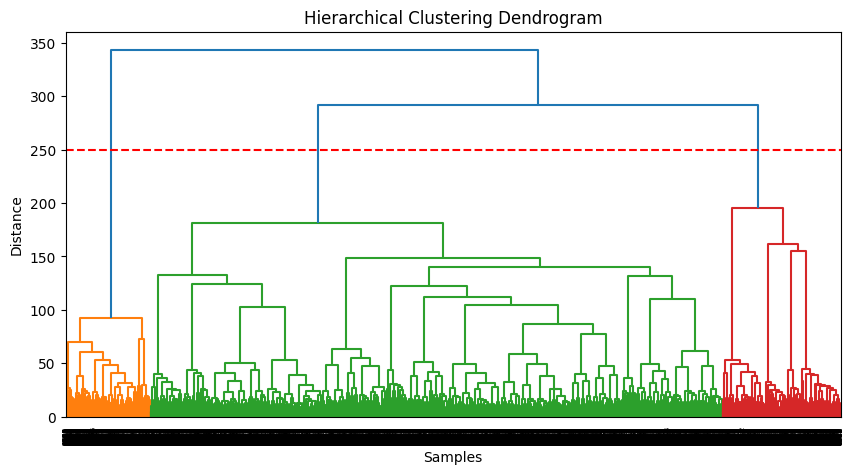

In [28]:
# Reduce to 40 dimensions (chosen from Scree Plot)
ipca = IncrementalPCA(n_components=40)  
scaled_data_ipca = ipca.fit_transform(scaled_data)  # Transform data

# Compute hierarchical clustering
linkage_matrix = linkage(scaled_data_ipca, method='ward')  # Ward's method for variance minimisation

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.axhline(y=250, color='r', linestyle='--')  # Adjust threshold based on the plot
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Train BIRCH on historical data
birch = Birch(threshold=0.5, branching_factor=50, n_clusters=3) # Number of clusters are decided from hierarchical clustering
birch.fit(scaled_data_ipca)

birch_labels = birch.predict(scaled_data_ipca)
print(birch_labels.head())

[2 2 0 ... 0 2 2]


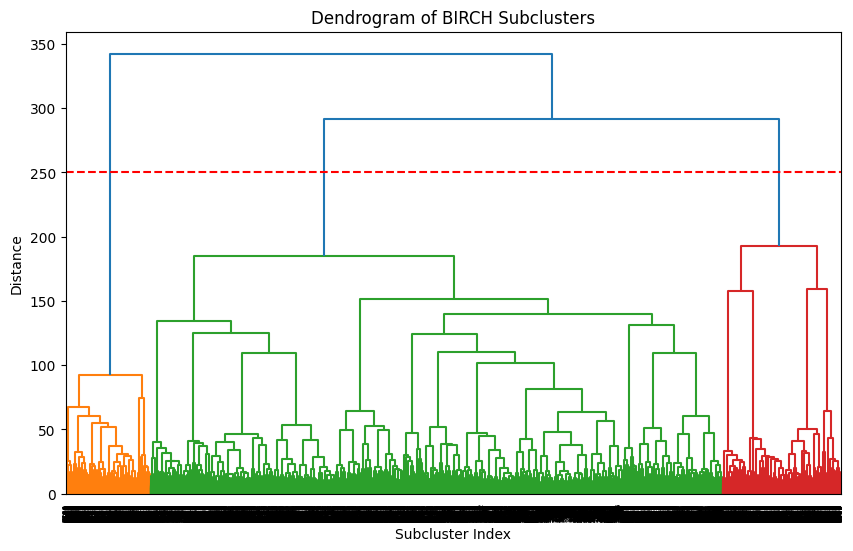

In [14]:
# Get subclusters
subcluster_centers = birch.subcluster_centers_

# Perform hierarchical clustering on subclusters
Z = linkage(subcluster_centers, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.axhline(y=250, color='r', linestyle='--')  # Adjust threshold based on the plot
plt.title("Dendrogram of BIRCH Subclusters")
plt.xlabel("Subcluster Index")
plt.ylabel("Distance")
plt.show()

In [21]:
# Add clusters to the customers dataset
birch_labels_df = pd.DataFrame(birch_labels, columns=['cluster'])

customer_data_with_BIRCH_clusters = pd.concat([customer_data.reset_index(drop=True), birch_labels_df.reset_index(drop=True)], axis=1)
print(customer_data_with_BIRCH_clusters.shape)

(9429, 17)


In [ ]:
# Save the dataframe to a .csv file
customer_data_with_BIRCH_clusters.to_csv('customers_with_BIRCH_clusters.csv', index=False)

# Real-time Segmentation Trial

In [ ]:
# Test the real-time segmentation capabilities of BIRCH
sample_data = scaled_data_ipca[900,].reshape(1, -1) # Take a random sample from the dataset or create a new sample

# Test the row
predicted_cluster = birch.predict(sample_data)
print(f"Tested row assigned to cluster: {predicted_cluster[0]}")

Tested row assigned to cluster: 1
